# Age Detection of Indian Actors - AV Practice Problem

In [1]:
from theano.sandbox import cuda
cuda.use('gpu2')

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: Tesla K80 (CNMeM is disabled, cuDNN 5103)
WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

WARNING (theano.sandbox.cuda): Ignoring call to use(2), GPU number 0 is already in use.


In [2]:
%matplotlib inline

In [3]:
# Importing relevant libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.misc import *

In [4]:
import os, sys
from PIL import Image

In [5]:
DATA_HOME_DIR = os.getcwd()

In [6]:
%pwd

u'/home/ubuntu/AgeDetection_AV'

## Reading the class labels file

In [7]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [36]:
test.head()

,ID
0,25321.jpg
1,989.jpg
2,19277.jpg
3,13093.jpg
4,5367.jpg


In [9]:
train.groupby(by = "Class").count()

,ID
Class,
MIDDLE,10804
OLD,2396
YOUNG,6706


## Data segregation and preparation

1. Create validation set out of the train set

2. Since there are 3 classes, each folder (Train/Validation) will have three sub-folders (Young/Middle/Old)

3. These 3 sub-folders will contain the relevant images based on the image-label mapping file (train.csv)



These steps have already been taken care of. We move to data exploration stage.




In [39]:
# Moving all test images into one 'unknown' class folder

%cd $DATA_HOME_DIR/Test
%mkdir unknown
%mv *.jpg unknown/

/home/ubuntu/AgeDetection_AV/Test


## Data Exploration

In [31]:
path = DATA_HOME_DIR + '/Test/'

In [32]:
from glob import glob
%cd $path
g = glob('*.jpg')

/home/ubuntu/AgeDetection_AV/Test


In [33]:
i = np.random.choice(np.arange(len(g)))
im = Image.open(path+g[i])

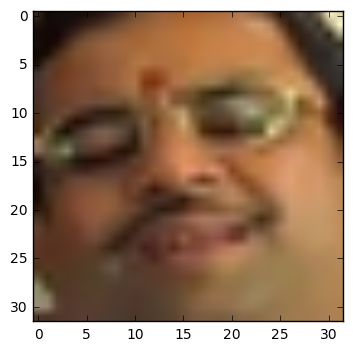

In [34]:
plt.imshow(im)

In [35]:
im.size

(32, 32)

### Preprocessing - Resizing all images

In [9]:
# Creating a custom resize function
def resize(path):
    for item in os.listdir(path):
        if os.path.isfile(path+item):
            im = Image.open(path+item)
            f, e = os.path.splitext(path+item)
            imResize = im.resize((32,32), Image.ANTIALIAS)
            imResize.save(f + '.jpg', 'JPEG', quality=100)

In [85]:
path = DATA_HOME_DIR + '/Train/old/'
resize(path)

path = DATA_HOME_DIR + '/Train/middle/'
resize(path)

path = DATA_HOME_DIR + '/Train/young/'
resize(path)

path = DATA_HOME_DIR + '/Validation/old/'
resize(path)

path = DATA_HOME_DIR + '/Validation/middle/'
resize(path)

path = DATA_HOME_DIR + '/Validation/young/'
resize(path)

### More pre-processing

a) Further pre-processing might include mean normalization/ standardization. This can be avoided by adding BatchNorm at the 1st layer (input layer) of the network.

b) Due to resizing, most of the images have become blurred. A sharpening filter can be used to restore some normalcy. However, adding a Conv. Layer will take of this as it will automatically learn this feature, if important and required.

In [20]:
%cd $DATA_HOME_DIR

/home/ubuntu/AgeDetection_AV


## Neural Network models - CNN and its variants

In [10]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import SGD
from keras.constraints import maxnorm

from keras import backend as K
K.set_image_dim_ordering('th')

Using Theano backend.


### Model 1 : Simple stacked CNN architecture with BatchNormalization

In [21]:
model = Sequential([
        BatchNormalization(input_shape = (3,32,32)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Flatten(),
        Dense(512, activation='relu'),
        Dense(3, activation='softmax')
        ])
model.compile(optimizer = 'nadam' , loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_1 (Batch (None, 3, 32, 32)         128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 30, 30)        896       
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 30, 30)        120       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 28, 28)        9248      
_________________________________________________________________
batch_normalization_3 (Batch (None, 32, 28, 28)        112       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 14, 14)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 12, 12)        18496     
__________

In [ ]:
from keras.preprocessing import image

In [ ]:
gen = image.ImageDataGenerator()

### Model 2 : CNN with BatchNormalization and Data augmentation - with and w/o Dropout

In [162]:
model = Sequential([
        BatchNormalization(input_shape = (3,32,32)),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(),
        Convolution2D(32,(3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(),
        Convolution2D(64,(3,3), activation='relu'),
        BatchNormalization(),
        MaxPooling2D(),
        Flatten(),
        Dropout(0.2),
        Dense(512, activation='relu'),
        Dropout(0.6),
        Dense(3, activation='softmax')
        ])
model.compile(optimizer = 'nadam' , loss='categorical_crossentropy', metrics=['accuracy'])

In [163]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization_22 (Batc (None, 3, 32, 32)         128       
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 32, 30, 30)        896       
_________________________________________________________________
batch_normalization_23 (Batc (None, 32, 30, 30)        120       
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 32, 28, 28)        9248      
_________________________________________________________________
batch_normalization_24 (Batc (None, 32, 28, 28)        112       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 14, 14)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 64, 12, 12)        18496     
__________

In [147]:
gen = image.ImageDataGenerator(rotation_range = 10, width_shift_range = 0.1, shear_range = 0.25,
                               height_shift_range = 0.1, zoom_range = 0.2, horizontal_flip = True)

In [115]:
trn_path = DATA_HOME_DIR + '/Train/'
val_path = DATA_HOME_DIR + '/Validation/'
test_path = DATA_HOME_DIR + '/Test/'

In [148]:
trn_batches = gen.flow_from_directory(trn_path, target_size = (32,32), class_mode = 'categorical', shuffle = True, batch_size = 64)
val_batches = gen.flow_from_directory(val_path, target_size = (32,32), class_mode = 'categorical', shuffle = False, batch_size = 128)

Found 16906 images belonging to 3 classes.
Found 3000 images belonging to 3 classes.


In [117]:
def lr_decay(start, stop, div_step_1, div_step_2) :
    k = 1
    while start >= stop:
        yield start
        if k==1 :
            start/= div_step_1
        else : start/= div_step_2
        k = k * -1

In [178]:
model.fit_generator(trn_batches, steps_per_epoch = (trn_batches.samples/trn_batches.batch_size), nb_epoch=1,
                   validation_data = val_batches, validation_steps = (val_batches.samples/val_batches.batch_size))

/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  from ipykernel import kernelapp as app
/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=1, validation_data=<keras.pre..., steps_per_epoch=264, validation_steps=23)`
  from ipykernel import kernelapp as app


Epoch 1/1
264/264 [==============================] - 119s - loss: 0.6525 - acc: 0.7338 - val_loss: 1.2209 - val_acc: 0.6027


In [176]:
model.optimizer.lr /= 2

In [149]:
for i in lr_decay(0.001, 0.0002, 2, 5):
    model.optimizer.lr = i
    print "Learning rate = " + str(i)
    model.fit_generator(trn_batches, steps_per_epoch = (trn_batches.samples/trn_batches.batch_size), nb_epoch=3,
                   validation_data = val_batches, validation_steps = (val_batches.samples/val_batches.batch_size))

Learning rate = 0.001


/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
/home/ubuntu/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., epochs=3, validation_data=<keras.pre..., steps_per_epoch=264, validation_steps=23)`


Epoch 1/3
264/264 [==============================] - 119s - loss: 1.0421 - acc: 0.5685 - val_loss: 0.8182 - val_acc: 0.6352
Epoch 2/3
264/264 [==============================] - 118s - loss: 0.8035 - acc: 0.6498 - val_loss: 0.7556 - val_acc: 0.6532
Epoch 3/3
264/264 [==============================] - 118s - loss: 0.7352 - acc: 0.6886 - val_loss: 0.6949 - val_acc: 0.6953
Learning rate = 0.0005
Epoch 1/3
264/264 [==============================] - 118s - loss: 0.6688 - acc: 0.7199 - val_loss: 0.8975 - val_acc: 0.6337
Epoch 2/3
264/264 [==============================] - 118s - loss: 0.6071 - acc: 0.7547 - val_loss: 0.9895 - val_acc: 0.6424
Epoch 3/3
264/264 [==============================] - 118s - loss: 0.4924 - acc: 0.8054 - val_loss: 1.5925 - val_acc: 0.5669


## Predicting results

In [29]:
resize(test_path)

In [165]:
test_batches = gen.flow_from_directory(test_path, target_size = (32,32), class_mode = None, shuffle = False, batch_size = 128)

Found 6636 images belonging to 1 classes.


In [179]:
preds = model.predict_generator(test_batches, (test_batches.samples/test_batches.batch_size)+1)

In [167]:
len(preds)

6636

In [180]:
preds[0:10,]

array([[ 0.01014638,  0.0931992 ,  0.89665437],
       [ 0.93962687,  0.04323382,  0.01713932],
       [ 0.01114907,  0.34671536,  0.64213562],
       [ 0.33994773,  0.30979532,  0.35025698],
       [ 0.0663897 ,  0.5537312 ,  0.37987915],
       [ 0.01337035,  0.17407076,  0.81255889],
       [ 0.85495168,  0.13777272,  0.00727567],
       [ 0.69301862,  0.02810235,  0.27887905],
       [ 0.25044081,  0.43045709,  0.31910217],
       [ 0.00166782,  0.15365475,  0.84467751]], dtype=float32)

In [181]:
class_labels = preds.argmax(axis = 1)

In [184]:
len(class_labels[class_labels == 0])

3023

In [185]:
for i in np.arange(0,len(class_labels)):
    if class_labels[i] == 0 : 
        labels[i] = 'MIDDLE'
    elif class_labels[i] == 1 :
        labels[i] = 'OLD'
    else : 
        labels[i] = 'YOUNG'


In [139]:
filenames = test_batches.filenames

In [158]:
ids = np.char.array([f[8::] for f in filenames])

In [159]:
ids[0:10]

chararray(['16015.jpg', '7366.jpg', '6873.jpg', '23196.jpg', '4512.jpg',
           '23819.jpg', '3175.jpg', '2472.jpg', '1188.jpg', '22634.jpg'],
          dtype='|S9')

In [186]:
dict = {'Class': labels,'ID': ids}
result = pd.DataFrame(data = dict)

In [187]:
# Writing the results to a csv file
%cd $DATA_HOME_DIR
result.to_csv('subm.csv')

/home/ubuntu/AgeDetection_AV
